In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm
import scipy.stats as stats
import copy
import os

In [2]:
data=pd.read_csv('insurance.csv')

In [3]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
data.shape

(1338, 7)

In [6]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


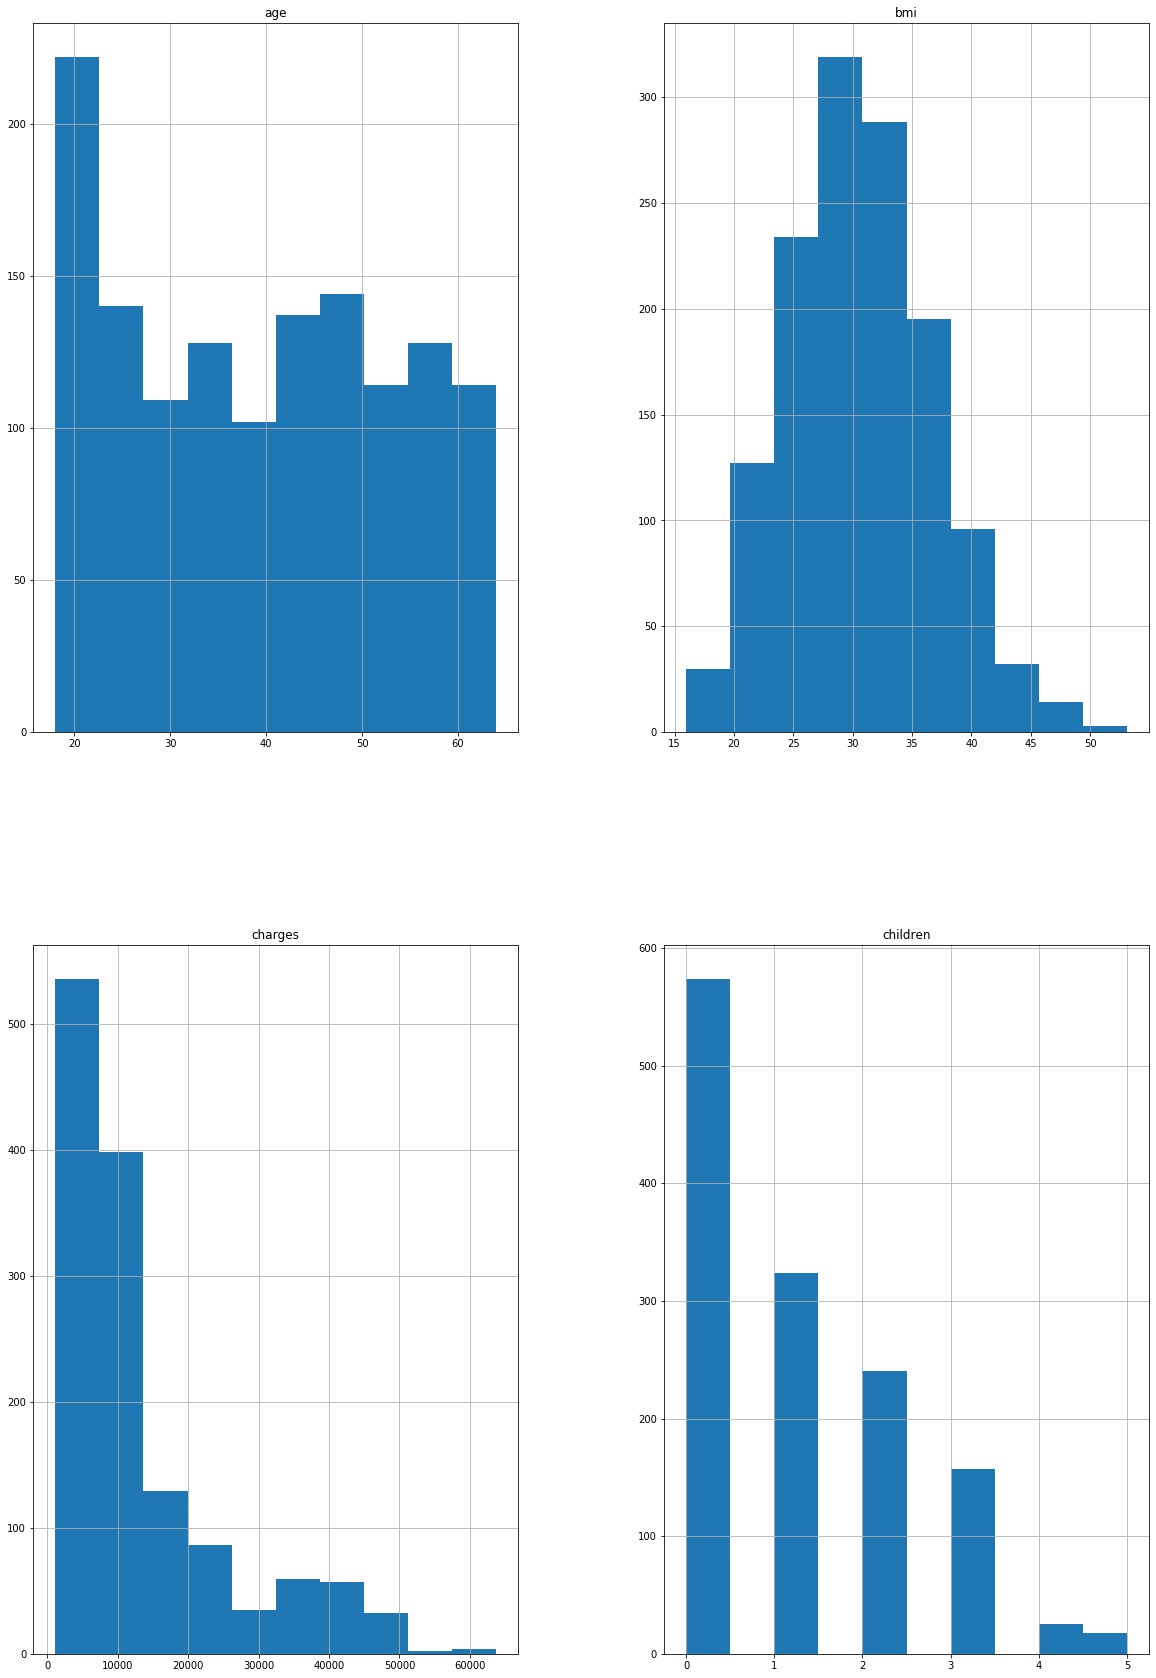

In [8]:
data.hist(figsize=(20,30));

In [9]:
Skewness = pd.DataFrame({'Skewness' : [stats.skew(data.bmi),stats.skew(data.age),stats.skew(data.charges)]},
                        index=['bmi','age','charges'])  # Measure the skeweness of the required columns
Skewness

,Skewness
bmi,0.283729
age,0.055610
charges,1.514180


In [25]:
data.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

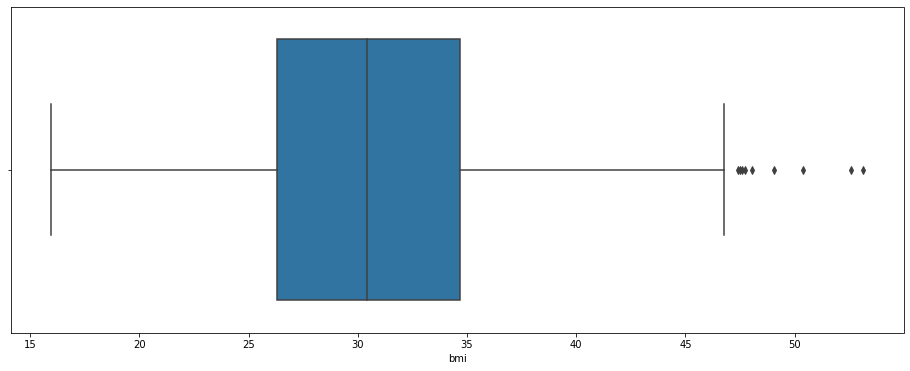

In [10]:
plt.figure(figsize=(16, 6))
sns.boxplot(data['bmi'],data=data);

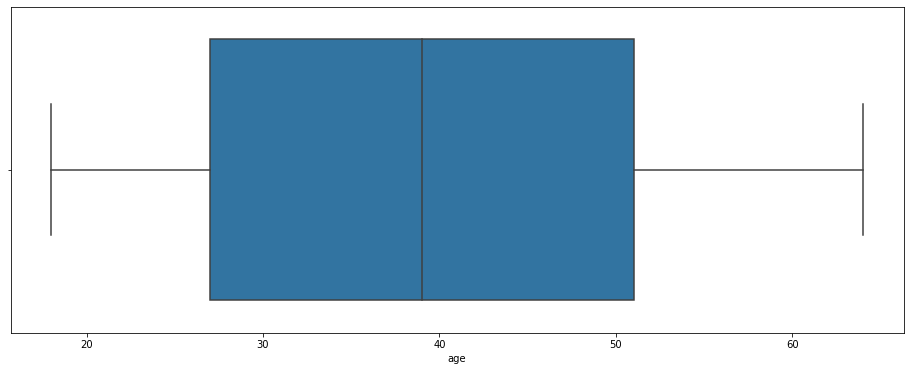

In [11]:
plt.figure(figsize=(16, 6))
sns.boxplot(data['age'],data=data);

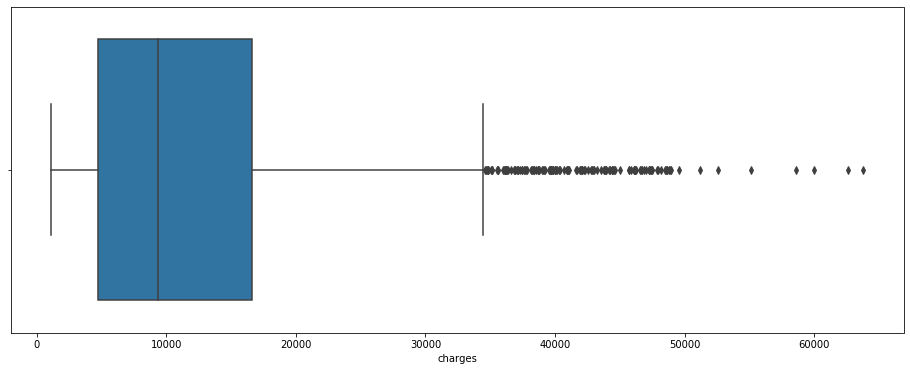

In [12]:
plt.figure(figsize=(16, 6))
sns.boxplot(data['charges'],data=data);

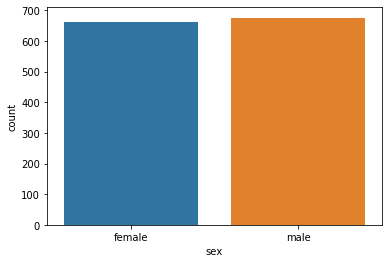

In [13]:
sns.countplot(data["sex"], data=data);

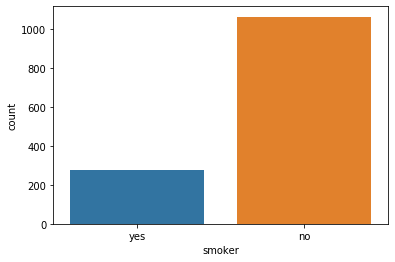

In [14]:
sns.countplot(data["smoker"], data=data);

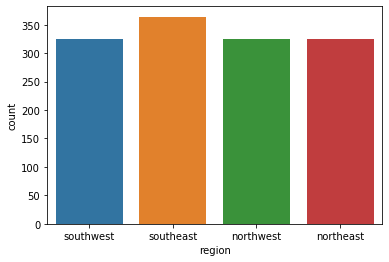

In [15]:
sns.countplot(data["region"], data=data);

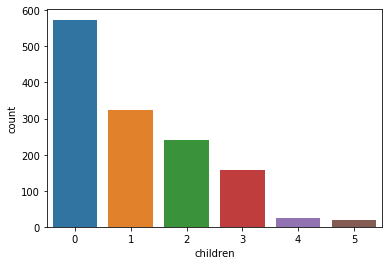

In [16]:
sns.countplot(data["children"], data=data);

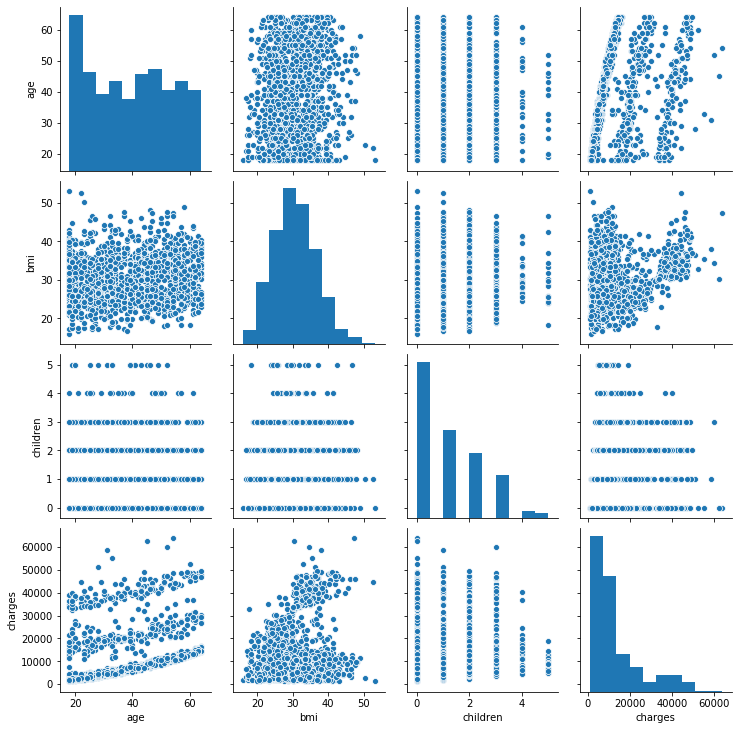

In [17]:
sns.pairplot(data);

In [18]:
corr = data.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


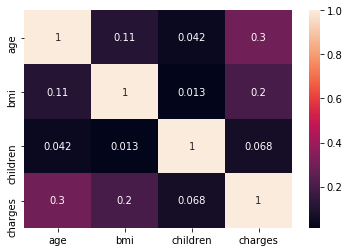

In [19]:
sns.heatmap(corr, annot=True);

In [6]:
data['smoker'].value_counts()
api=data.groupby('smoker')['charges'].mean()
api

smoker
no      8434.268298
yes    32050.231832
Name: charges, dtype: float64

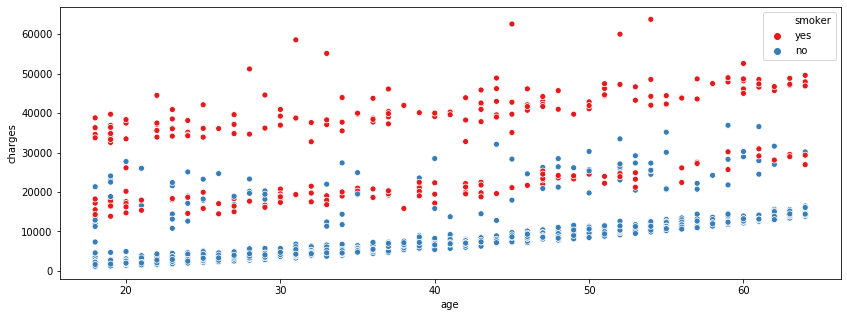

In [21]:
plt.figure(figsize=(14, 5))
sns.scatterplot(x=data["age"],y=data["charges"],hue=data["smoker"],palette="Set1");

In [10]:
data['sex'].value_counts()
bpi=data.groupby('sex')['bmi']
bpi.mean()

sex
female    30.377749
male      30.943129
Name: bmi, dtype: float64

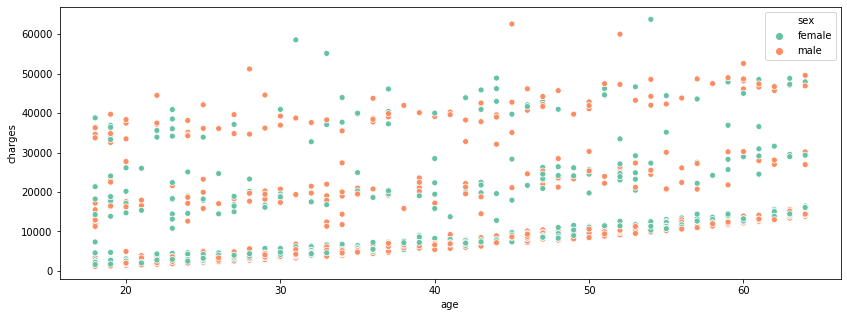

In [23]:
plt.figure(figsize=(14, 5))
sns.scatterplot(x=data["age"],y=data["charges"],hue=data["sex"],sizes=(100,200),palette="Set2",legend="full");